# Logistic Regression

# 1 gradient rise algorithm

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import math
"""
load the data set add a feature as X0
"""
def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

In [182]:
"""
sigmoid function
"""
import math
def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

In [183]:
def gradAscent(dataMatIn, ClassLabels, maxCycles = 500):
    """
    dataMatIn: the data turn to numpy
    ClassLabels: the label
    """
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(ClassLabels).transpose() # transpose to the n * 1 shape
    m, n = np.shape(dataMatrix)
    alpha = 0.001
    #maxCycles = 500
    weights = np.ones((n, 1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose() * error # adjust every feature more near to the reality point
    return weights

In [184]:
dataArr, labelMat = loadDataSet()

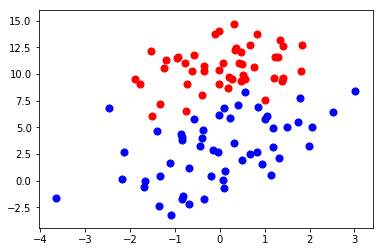

In [185]:
dataMatrix = np.mat(dataArr)
for i in range(len(dataMatrix)):
    if labelMat[i] == 0:
        plt.scatter(np.array(dataMatrix[i, 1]), np.array(dataMatrix[i, 2]), c = 'r', s = 50)
    else:
        plt.scatter(np.array(dataMatrix[i, 1]), np.array(dataMatrix[i, 2]), c = 'b', s = 50)
plt.show()

In [186]:
np.mat(labelMat)

matrix([[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
         1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
         0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
         0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
         1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0]])

In [187]:
weights = gradAscent(dataArr, labelMat)
weights

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

## plot the scatter and line

In [188]:
def plotBestFit(weights):
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat) # must turn to array can be plotted
    n = np.shape(dataArr)[0]
    xcord1 = []
    ycord1 = [] # the first category point
    xcord2 = []
    ycord2 = [] # the second category point
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2]) # xcord ycord all a list of line
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s = 30, c = 'red', marker = 's')
    ax.scatter(xcord2, ycord2, s = 30, c = 'green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

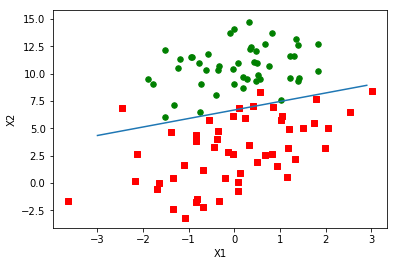

In [189]:
plotBestFit(weights.getA())

## improve gradient ascent(stochastic gradient ascent)

In [190]:
"""
rand get a data to update gradient
"""
def stochasticGradAscend0(dataMatrix, classLabels, t = 30):
    m, n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n) # get a array ([1, 1, 1, ...]) all the data is number which different from all element is numpy in gradient ascent
    for i in range(t): # cycle times change to m not self-defined number to contrapose every point
        h = sigmoid(np.sum(dataMatrix * weights))
        error = classLabels[i] - h # note that it is only a number
        weights = weights + alpha * error * dataMatrix[i]
    return weights

In [191]:
weights = stochasticGradAscend0(np.array(dataArr), labelMat)

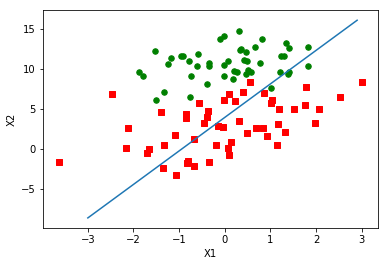

In [192]:
plotBestFit(weights)

## plot the relationship between iteration times and convergence situation

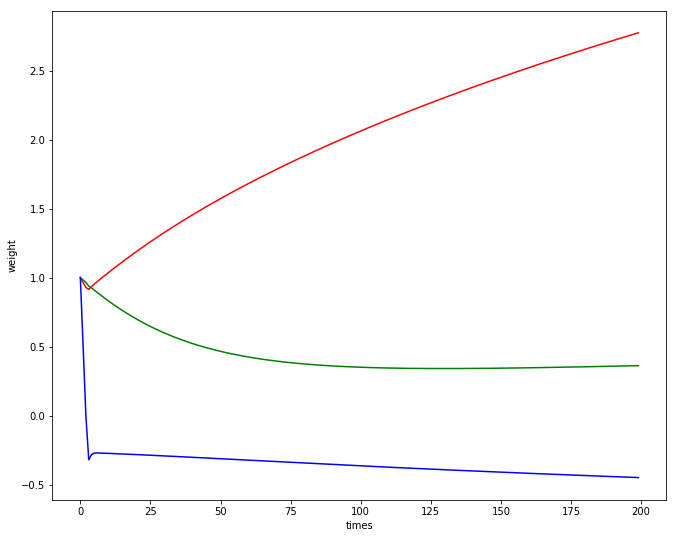

In [193]:
x = np.arange(0, 200, 1)
x0 = []
x1 = []
x2 = []
for i in range(len(x)):
    weights = np.array(gradAscent(np.array(dataArr), labelMat, i))
    x0.append(weights[0])
    x1.append(weights[1])
    x2.append(weights[2])
fig = plt.figure(figsize = (11, 9))
ax = fig.add_subplot(111)
ax.plot(x, x0, c = 'r', label = 'x0')
ax.plot(x, x1, c = 'g', label = 'x1')
ax.plot(x, x2, c = 'b', label = 'x2')
plt.xlabel('times')
plt.ylabel('weight')
plt.show()

## improve the gradient ascend

In [194]:
import random
def stochasticGradAscend1(dataMatrix, classLabels, numIter = 150):
    m, n = np.shape(dataMatrix)
    weights = np.ones(n)
    for i in range(numIter):
        dataIndex = range(m)
        for j in range(m):
            alpha = 4 / (1.0 + j + i) + 0.01 # change the step the size can change while iterating
            randIndex = int(random.uniform(0, len(dataIndex))) # rand generate a number as the modify parameter
            h = sigmoid(np.sum(dataMatrix[randIndex] * weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * dataMatrix[randIndex] * error
            del(dataIndex[randIndex]) # only delete the index of the inner cycle
    return weights

j:\python\install\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


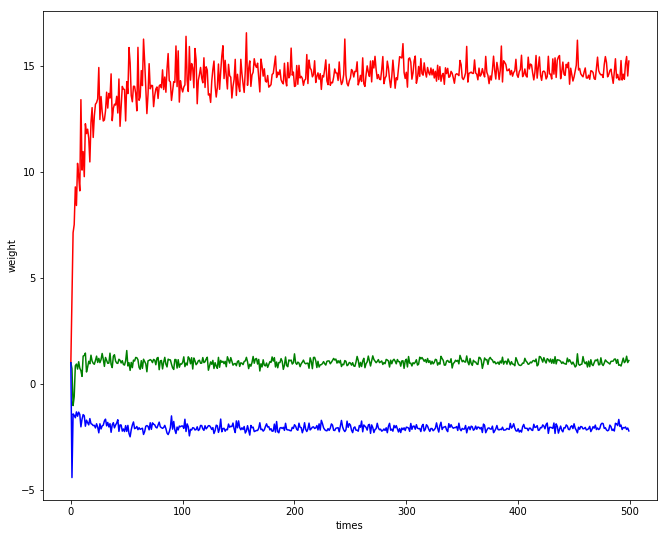

In [195]:
x = np.arange(0, 500, 1)
x0 = []
x1 = []
x2 = []
for i in range(len(x)):
    weights = np.array(stochasticGradAscend1(np.array(dataArr), labelMat, i))
    x0.append(weights[0])
    x1.append(weights[1])
    x2.append(weights[2])
fig = plt.figure(figsize = (11, 9))
ax = fig.add_subplot(111)
ax.plot(x, x0, c = 'r', label = 'x0')
ax.plot(x, x1, c = 'g', label = 'x1')
ax.plot(x, x2, c = 'b', label = 'x2')
plt.xlabel('times')
plt.ylabel('weight')
plt.show()

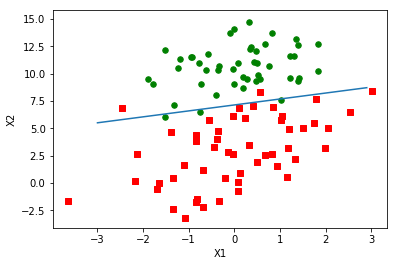

In [196]:
weights = stochasticGradAscend1(np.array(dataMatrix), labelMat)
plotBestFit(weights) # the result in contrast to front more greater

# 2 use logistic model predict the disease of the horse

In [197]:
def classifyVector(inX, weights):
    prob = sigmoid(np.sum(inX * weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0

In [198]:
def colicTest():
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet = []
    trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stochasticGradAscend1(np.array(trainingSet), trainingLabels, 500)
    errorCount = 0
    numTestVec = 0.0
    for line in frTest.readlines(): # import test_set to test effect
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr), trainWeights)) != int((currLine[21])):
            errorCount += 1
    errorRate = (float(errorCount) / numTestVec)
    print "the error rate of this test is: %f" % errorRate
    return errorRate

In [199]:
def multiTest(): # call colicTest for ten times calculate means
    numTests = 10
    errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print "after %d iterations the average error rate is: %f" % (numTests, errorSum / float(numTests))

In [200]:
multiTest()

j:\python\install\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


the error rate of this test is: 0.492537
the error rate of this test is: 0.388060
the error rate of this test is: 0.373134
the error rate of this test is: 0.343284
the error rate of this test is: 0.268657
the error rate of this test is: 0.358209
the error rate of this test is: 0.298507
the error rate of this test is: 0.402985
the error rate of this test is: 0.373134
the error rate of this test is: 0.402985
after 10 iterations the average error rate is: 0.370149
